## Image Inpainting
- Image inpainting is a class of algorithms in computer vision where the objective is to fill regions inside an image or a video.

- The region is identified using a binary mask, and the filling is usually done by propagating information from the boundary of the region that needs to be filled.

- The most common application of image inpainting is restoration of old scanned photos. It is also used for removing small unwanted objects in an image. 


## Inpainting Algorithms
In this section, we will briefly discuss two inpainting algorithms implemented in OpenCV.

### 1. INPAINT_NS : Navier-Stokes based Inpainting
This method was published in 2001 in a paper titled “Navier-Stokes, Fluid Dynamics, and Image and Video Inpainting”

In the image below, our objective is to fill the dark region and obtain an image that looks like the one on the right.

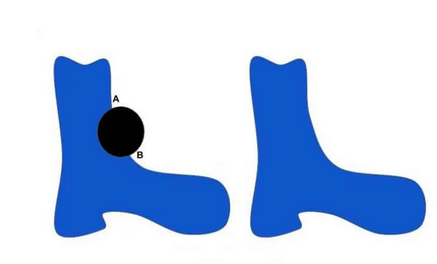

How do we fill this black region? One constraint we would like is the edge entering point A should continue to the edge leaving point B. The other constraint we may want is that the region on the right of the curve joining A and B should be white, and the region on the left should be blue.

The above two constraints essentially state

1. Preserve gradients (i.e. edge like features)
2. Continue to propagate color information in smooth regions

The authors set up a partial differential equation (PDE) to update image intensities inside the region with the above constraints.

The image smoothness information is estimated by the image Laplacian and it is propagated along the isophotes (contours of equal intensities). The isophotes are estimated by the image gradient rotated by 90 degrees.

The authors show that these equations are closely related in form to the Navier-Stokes equations for 2D incompressible fluids.

The benefit of reducing the problem to one of fluid dynamics is that we benefit from well developed theoretical analysis and numerical tools. 

### 2. INPAINT_TELEA : Fast Marching Method based

This implementation is based on a paper titled “An Image Inpainting Technique Based on the Fast Marching Method” by Alexandru Telea.

This implementation solves the same constraints using a different technique. Instead of using the image Laplacian as the estimator of smoothness, the author uses a weighted average over a known image neighborhood of the pixel to inpaint. The known neighborhood pixels and gradients are used to estimate the color of the pixel to be inpainted.

Once a pixel is inpainted, the boundary needs to updated. The author treats the missing region of the image as level sets and uses the fast marching method to update the boundary. 

In [2]:
import numpy as np
import cv2 as cv

In [3]:
# OpenCV Utility Class for Mouse Handling
class Sketcher:
    def __init__(self, windowname, dests, colors_func):
        self.prev_pt = None
        self.windowname = windowname
        self.dests = dests
        self.colors_func = colors_func
        self.dirty = False
        self.show()
        cv.setMouseCallback(self.windowname, self.on_mouse)

    def show(self):
        cv.imshow(self.windowname, self.dests[0])
        cv.imshow(self.windowname + ": mask", self.dests[1])

    # onMouse function for Mouse Handling
    def on_mouse(self, event, x, y, flags, param):
        pt = (x, y)
        if event == cv.EVENT_LBUTTONDOWN:
            self.prev_pt = pt
        elif event == cv.EVENT_LBUTTONUP:
            self.prev_pt = None

        if self.prev_pt and flags & cv.EVENT_FLAG_LBUTTON:
            for dst, color in zip(self.dests, self.colors_func()):
                cv.line(dst, self.prev_pt, pt, color, 5)
            self.dirty = True
            self.prev_pt = pt
            self.show()

In [6]:

# Read image in color mode
img = cv.imread("./images/old.jpg", cv.IMREAD_COLOR)

# Create a copy of original image
img_mask = img.copy()

# Create a black copy of original image
# Acts as a mask
inpaintMask = np.zeros(img.shape[:2], np.uint8)

# Create sketch using OpenCV Utility Class: Sketcher
sketch = Sketcher('image', [img_mask, inpaintMask], lambda : ((255, 255, 255), 255))

while True:
    ch = cv.waitKey()
    if ch == 27:
        break
    if ch == ord('t'):
        # Use Algorithm proposed by Alexendra Telea: Fast Marching Method (2004)
        # Reference: https://pdfs.semanticscholar.org/622d/5f432e515da69f8f220fb92b17c8426d0427.pdf
        res = cv.inpaint(src=img_mask, inpaintMask=inpaintMask, inpaintRadius=3, flags=cv.INPAINT_TELEA)
        cv.imshow('Inpaint Output using FMM', res)
    if ch == ord('n'):
        # Use Algorithm proposed by Bertalmio, Marcelo, Andrea L. Bertozzi, and Guillermo Sapiro: Navier-Stokes, Fluid Dynamics, and Image and Video Inpainting (2001)
        res = cv.inpaint(src=img_mask, inpaintMask=inpaintMask, inpaintRadius=3, flags=cv.INPAINT_NS)
        cv.imshow('Inpaint Output using NS Technique', res)
    if ch == ord('r'):
        img_mask[:] = img
        inpaintMask[:] = 0
        sketch.show()

cv.destroyAllWindows()


QObject::moveToThread: Current thread (0x213e670) is not the object's thread (0x30d1890).
Cannot move to target thread (0x213e670)

QObject::moveToThread: Current thread (0x213e670) is not the object's thread (0x30d1890).
Cannot move to target thread (0x213e670)

QObject::moveToThread: Current thread (0x213e670) is not the object's thread (0x30d1890).
Cannot move to target thread (0x213e670)

QObject::moveToThread: Current thread (0x213e670) is not the object's thread (0x30d1890).
Cannot move to target thread (0x213e670)

QObject::moveToThread: Current thread (0x213e670) is not the object's thread (0x30d1890).
Cannot move to target thread (0x213e670)

QObject::moveToThread: Current thread (0x213e670) is not the object's thread (0x30d1890).
Cannot move to target thread (0x213e670)

QObject::moveToThread: Current thread (0x213e670) is not the object's thread (0x30d1890).
Cannot move to target thread (0x213e670)

QObject::moveToThread: Current thread (0x213e670) is not the object's thread